# 数据可视化作业题目(基于`seaborn`)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %config InlineBackend.figure_format= "svg"
# plt.rcParams["xtick.direction"]="in"
# plt.rcParams["ytick.direction"]="in"

# ignore the SSL verification 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
sns.set()

## 练习1：航班乘客变化分析 (2个题)

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### 分析年度乘客总量的变化情况（提示：折线图）+ 乘客量在一年中12个月份的分布（提示：柱状图）

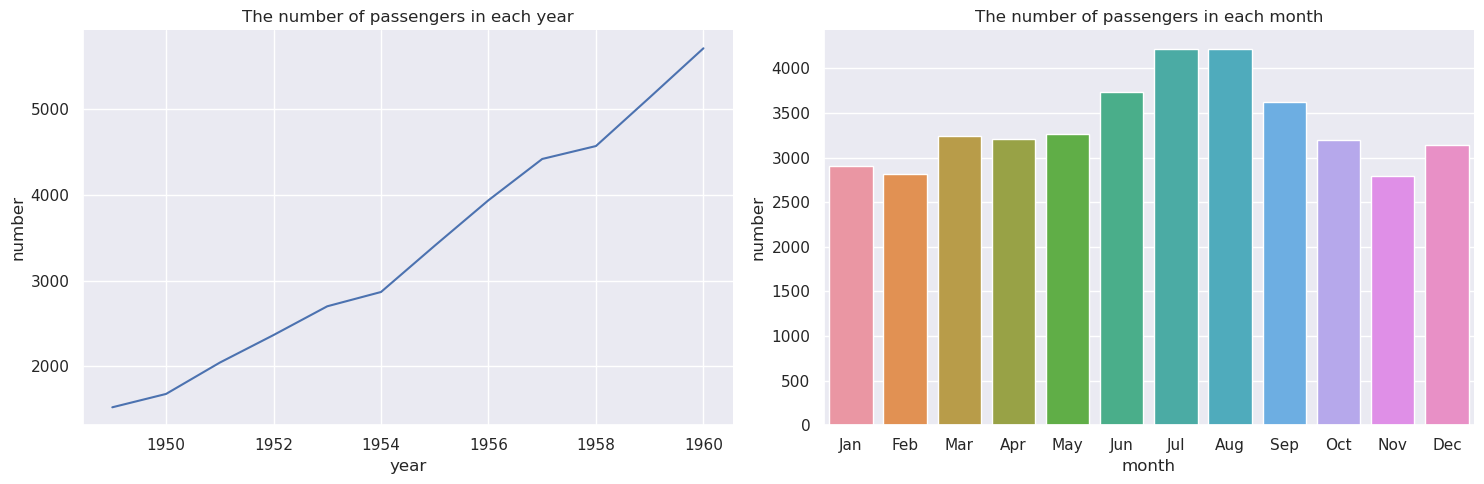

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax = axes[0]
passengers_pyr = data.groupby("year")["passengers"].sum()
sns.lineplot(x=passengers_pyr.index, y=passengers_pyr.values, ax=ax)
ax.set_title("The number of passengers in each year")
ax.set_xlabel("year")
ax.set_ylabel("number")

ax = axes[1]
passengers_pmon = data.groupby("month")["passengers"].sum()
sns.barplot(x=passengers_pmon.index, y=passengers_pmon.values, ax=ax)
ax.set_title("The number of passengers in each month")
ax.set_xlabel("month")
ax.set_ylabel("number")

sns.despine()
fig.tight_layout()
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

In [5]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

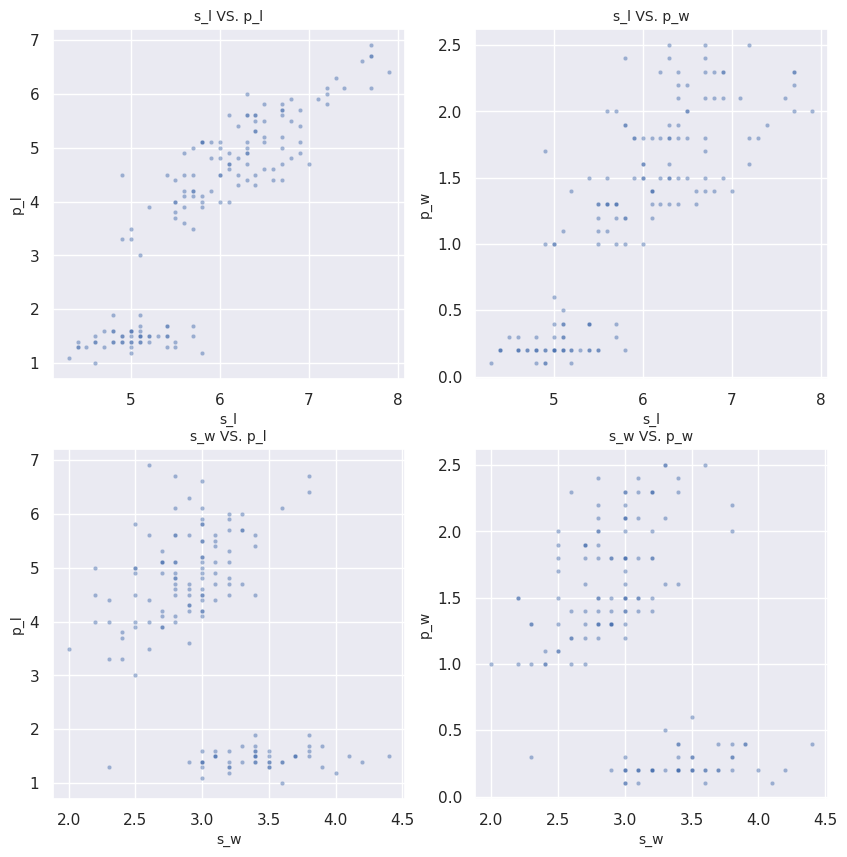

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

labels_dict = {"s_l": "sepal_length", "s_w": "sepal_width", "p_l": "petal_length", "p_w": "petal_width"}
xlabels = ["s_l", "s_w"]
ylabels = ["p_l", "p_w"]

for i in range(2):
    xlabel = xlabels[i]
    for j in range(2):
        ylabel = ylabels[j]
        ax = axes[i,j]
        sns.scatterplot(x=data[labels_dict[xlabel]], y=data[labels_dict[ylabel]], ax=ax, s=10, alpha=0.5)
        ax.set_xlabel(xlabel, fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_title(f"{xlabel} VS. {ylabel}", fontsize=10)

plt.show()

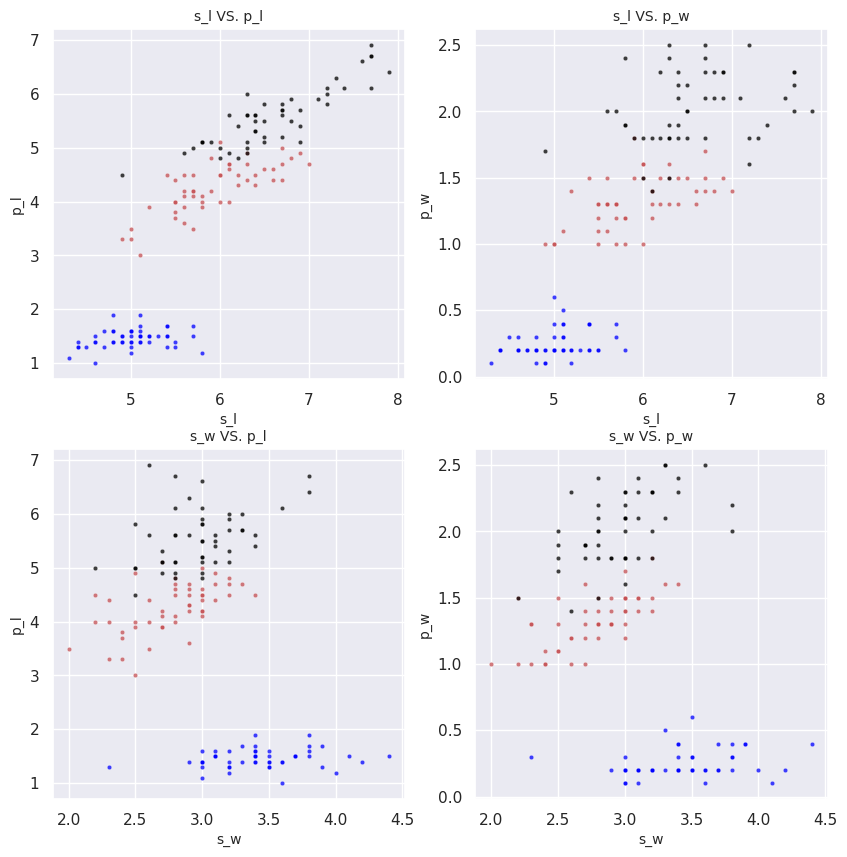

In [7]:
fig, axes=plt.subplots(2, 2, figsize=(10, 10))
labels_dict={"s_l":"sepal_length", "s_w":"sepal_width", "p_l":"petal_length", "p_w":"petal_width"}
xlabels=["s_l", "s_w"]
ylabels=["p_l", "p_w"]
colors=["blue", "r", "black"]

for ns, spec in enumerate(data["species"].unique()):
    sl= data["species"]==spec
    for i in range(2):
        xlabel=xlabels[i]
        for j in range(2):
            ylabel=ylabels[j]
            ax=axes[i,j]
            sns.scatterplot(x=data[labels_dict[xlabel]][sl], y=data[labels_dict[ylabel]][sl], ax=ax, s=10, alpha=0.75, color=colors[ns])            
            ax.set_xlabel(xlabel, fontsize=10)
            ax.set_ylabel(ylabel, fontsize=10)
            ax.set_title(f"{xlabel} VS. {ylabel}", fontsize=10)


#### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

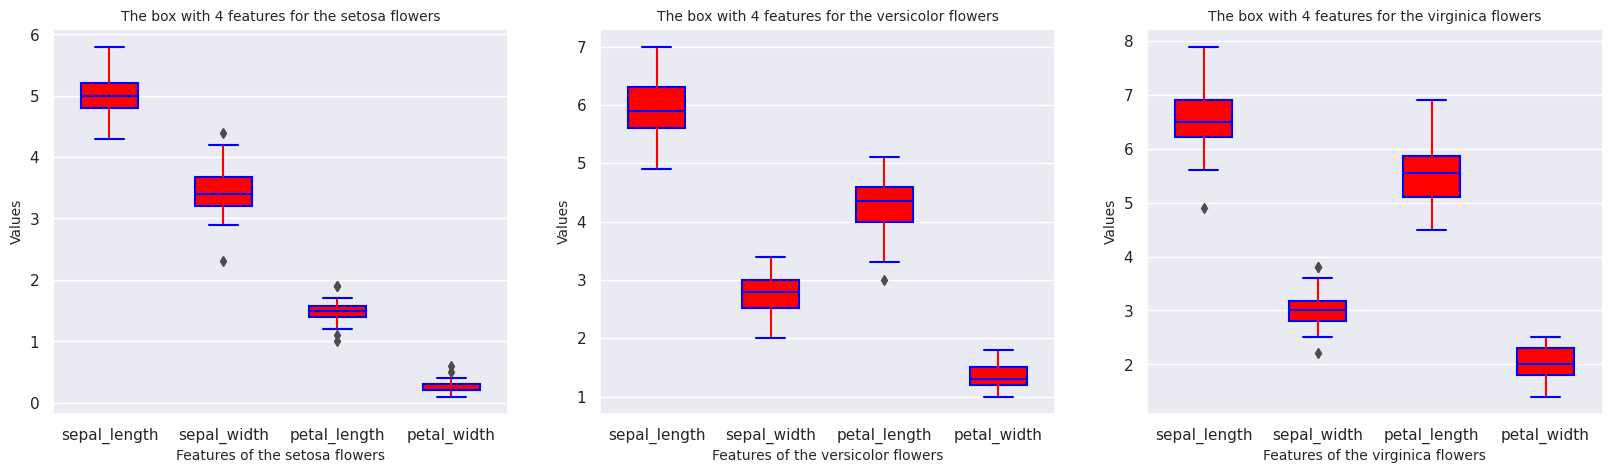

In [8]:
fig, axes=plt.subplots(1, 3, figsize=(20, 5))
species=data["species"].unique().tolist()
features=data.columns.tolist()[:-1]

for ns, spec in enumerate(species):
    sl = data["species"] == spec
    ax = axes[ns]
    sns.boxplot(data=data[sl][features], ax=ax, palette=["red"], width=0.5,
                boxprops={'facecolor': 'red', 'edgecolor': 'blue'}, 
               medianprops={'color': 'blue'}, 
               capprops={'color': 'blue'}, 
               whiskerprops={'color': 'red'})
    ax.set_xlabel(f"Features of the {spec} flowers", fontsize=10)
    ax.set_ylabel("Values", fontsize=10)
    ax.set_title(f"The box with 4 features for the {spec} flowers", fontsize=10)

#### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

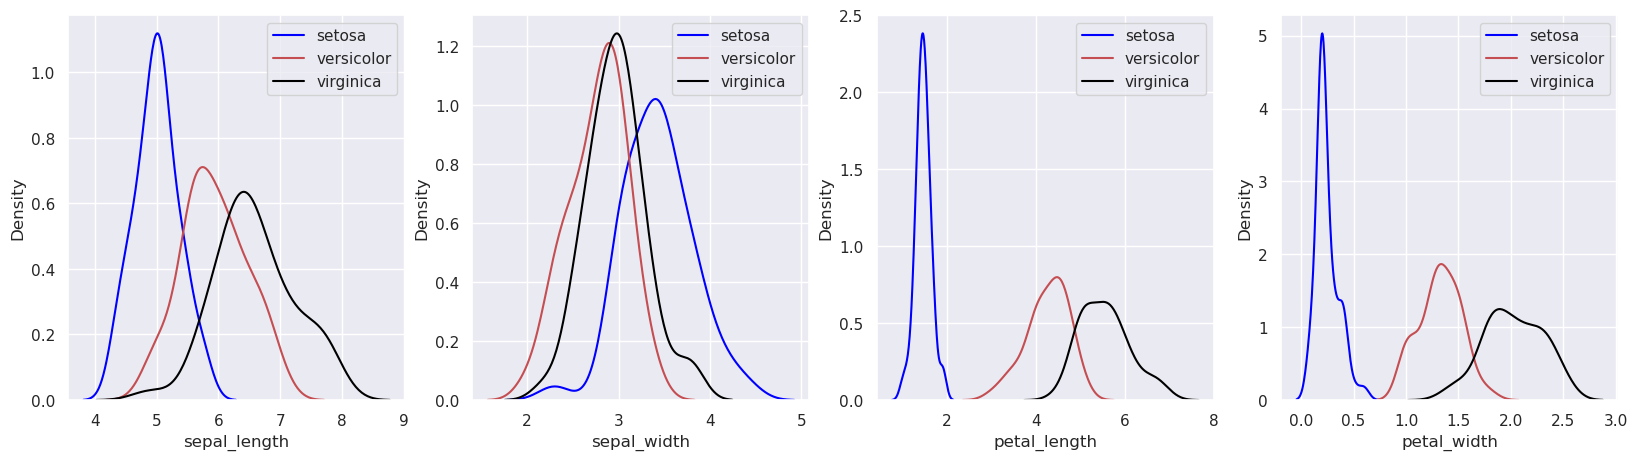

In [9]:
fig, axes=plt.subplots(1, 4, figsize=(20, 5))
species=data["species"].unique().tolist()
features=data.columns.tolist()[:-1]
colors=["blue", "r", "black"]
for nf, feature in enumerate(features):
    ax=axes[nf]
    # ax.set_title(feature)
    for ns, spec in enumerate(species):
        sl= data["species"]==spec
        data_sl=data[feature][sl]
        sns.kdeplot(data_sl, ax=ax, label=spec, color=colors[ns])
    ax.legend()


## 练习3：餐厅小费情况分析 (7个题)

In [10]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

Text(0.5, 1.0, 'total_bill vs. tip')

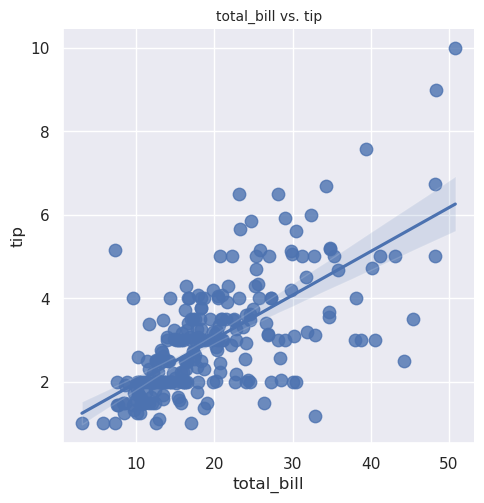

In [11]:
xlabel = "total_bill"
ylabel = "tip"
sns.lmplot(x=xlabel, y=ylabel
           , data=data
           , order=1, ci=90
           , scatter_kws={"s": 80}
           )
plt.title(f"{xlabel} vs. {ylabel}", fontsize=10)

#### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

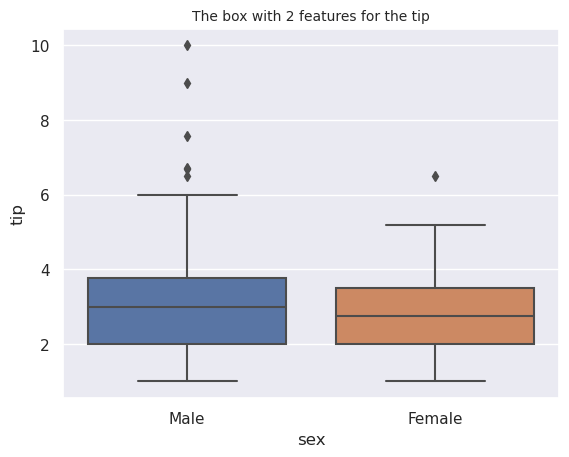

In [12]:
xlabel="sex"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

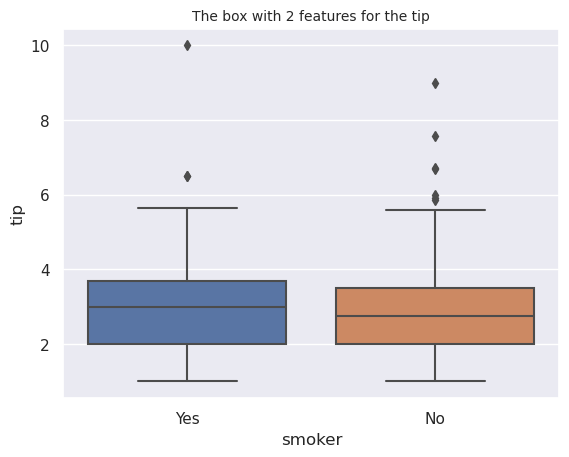

In [13]:
xlabel="smoker"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 4 features for the tip')

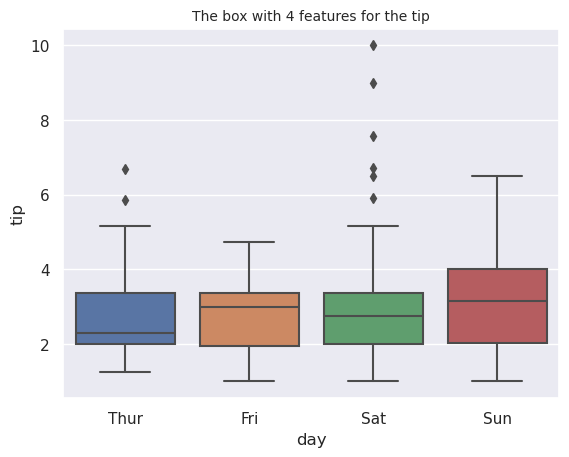

In [14]:
xlabel="day"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the tip')

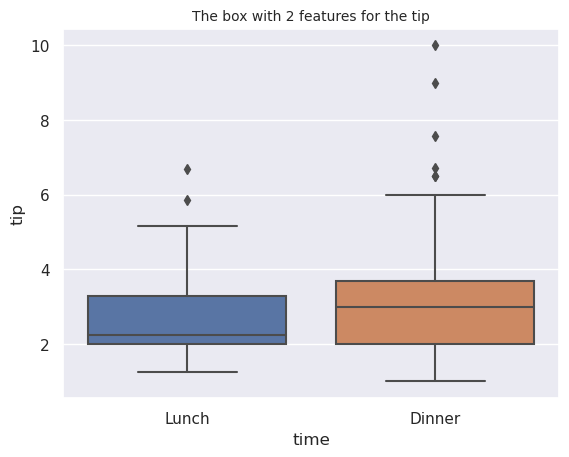

In [15]:
xlabel="time"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)

#### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 6 features for the tip')

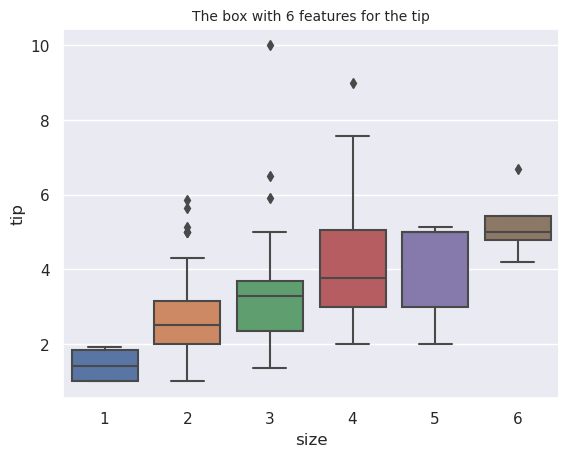

In [16]:
xlabel="size"
ylabel="tip"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)


#### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

Text(0.5, 1.0, 'Values by Sex (Male or Female) and Smoker (Yes or No)')

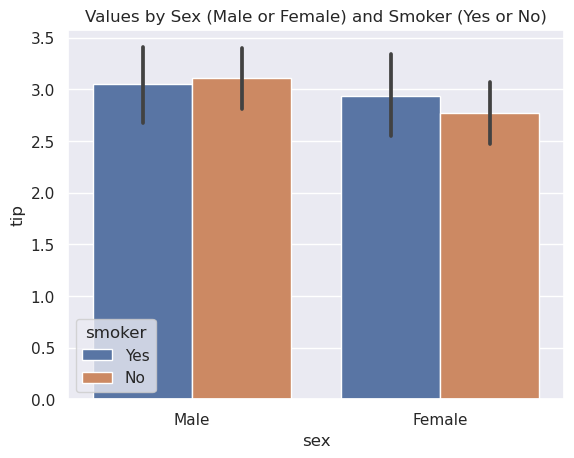

In [17]:
xlabel="sex"
ylabel="tip"
hue="smoker"
sns.barplot(x=xlabel, y=ylabel, data=data, hue=hue)
plt.title("Values by Sex (Male or Female) and Smoker (Yes or No)")


## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

In [18]:
data = sns.load_dataset("titanic")
data["counts"]=[1]*len(data.index)
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,counts
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


#### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

In [19]:

x2="survived"
data.groupby("pclass")[x2].sum()
data.isnull().any(axis=0)[x2]
print(f"whether the column {x2} contains NaN: {data.isnull().any(axis=0)[x2]}")

sur_prop=data.groupby("pclass")[x2].sum().to_frame()
sur_prop["unsurved"]=data.groupby("pclass")[x2].size()-sur_prop[x2]
sur_prop["total"]=data.groupby("pclass")[x2].size()
sur_prop["survived_prop"]=sur_prop[x2]/sur_prop["total"]
sur_prop["unsurvived_prop"]=sur_prop["unsurved"]/sur_prop["total"]
sur_prop["pclass"]=sur_prop.index
sur_prop

whether the column survived contains NaN: False


,survived,unsurved,total,survived_prop,unsurvived_prop,pclass
pclass,,,,,,
1,136,80,216,0.629630,0.370370,1
2,87,97,184,0.472826,0.527174,2
3,119,372,491,0.242363,0.757637,3


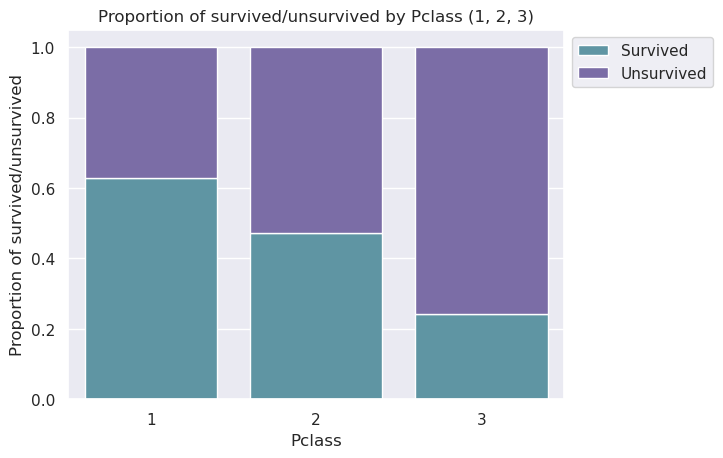

In [20]:

colors=["#539caf", "#7663b0"]
labels=["Survived", "Unsurvived"]
bottom=0

for j, num in enumerate(["survived_prop", "unsurvived_prop"]):
    y=sur_prop[num]
    sns.barplot(x="pclass", y=y, data=sur_prop, color=colors[j], label=labels[j], errorbar=None, bottom=bottom)
    bottom=bottom+y

plt.xlabel("Pclass")
plt.ylabel("Proportion of survived/unsurvived")
plt.title("Proportion of survived/unsurvived by Pclass (1, 2, 3)")
plt.legend(bbox_to_anchor = (1,1))

#### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

In [21]:
x1="sex"
x2="survived"
data.groupby(x1)[x2].sum()
data.isnull().any(axis=0)[x2]
print(f"whether the column {x2} contains NaN: {data.isnull().any(axis=0)[x2]}")

sur_prop=data.groupby(x1)[x2].sum().to_frame()
sur_prop["unsurved"]=data.groupby(x1)[x2].size()-sur_prop[x2]
sur_prop["total"]=data.groupby(x1)[x2].size()
sur_prop["survived_prop"]=sur_prop[x2]/sur_prop["total"]
sur_prop["unsurvived_prop"]=sur_prop["unsurved"]/sur_prop["total"]
sur_prop["sex"]=sur_prop.index
sur_prop

whether the column survived contains NaN: False


,survived,unsurved,total,survived_prop,unsurvived_prop,sex
sex,,,,,,
female,233,81,314,0.742038,0.257962,female
male,109,468,577,0.188908,0.811092,male


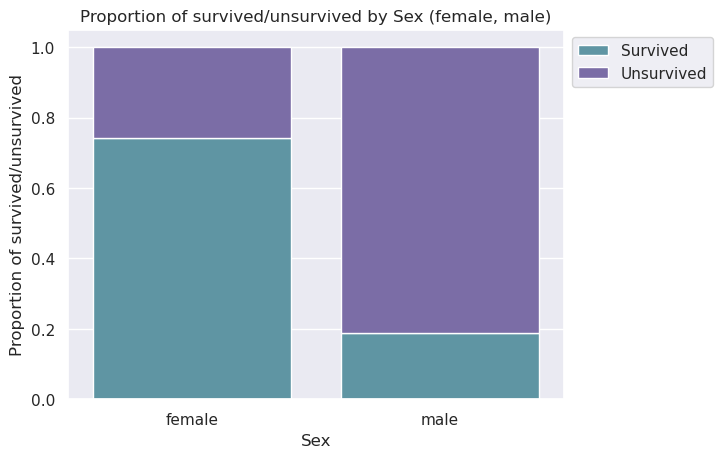

In [22]:

colors=["#539caf", "#7663b0"]
labels=["Survived", "Unsurvived"]
bottom=0

for j, num in enumerate(["survived_prop", "unsurvived_prop"]):
    y=sur_prop[num]
    sns.barplot(x="sex", y=y, data=sur_prop, color=colors[j], label=labels[j], errorbar=None, bottom=bottom)
    bottom=bottom+y

plt.xlabel("Sex")
plt.ylabel("Proportion of survived/unsurvived")
plt.title("Proportion of survived/unsurvived by Sex (female, male)")
plt.legend(bbox_to_anchor = (1,1))

#### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the fare')

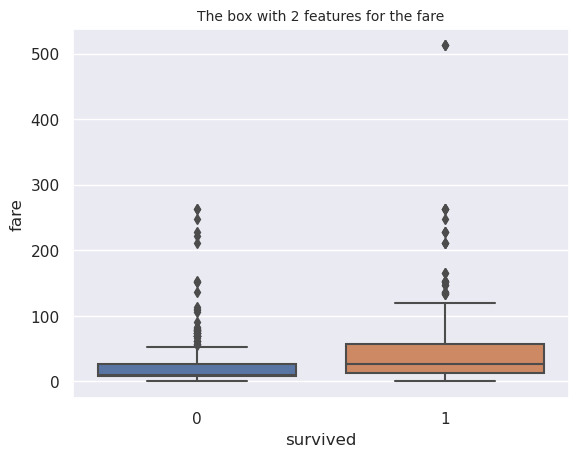

In [23]:
xlabel="survived"
ylabel="fare"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)


#### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the age')

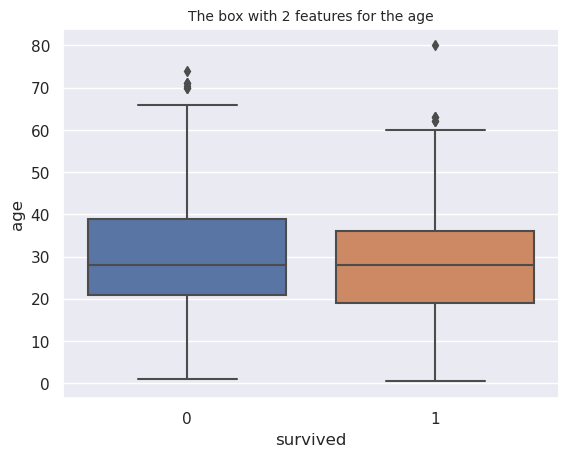

In [24]:
xlabel="survived"
ylabel="age"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)


#### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

<Axes: xlabel='embarked', ylabel='counts'>

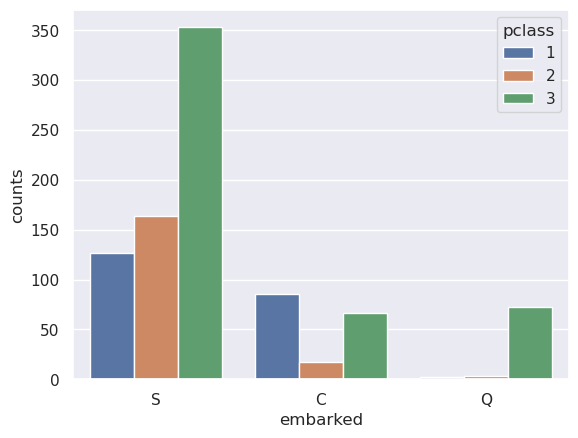

In [25]:
sns.barplot(x="embarked", y="counts", hue="pclass", estimator="sum", data=data)

#### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the sibsp')

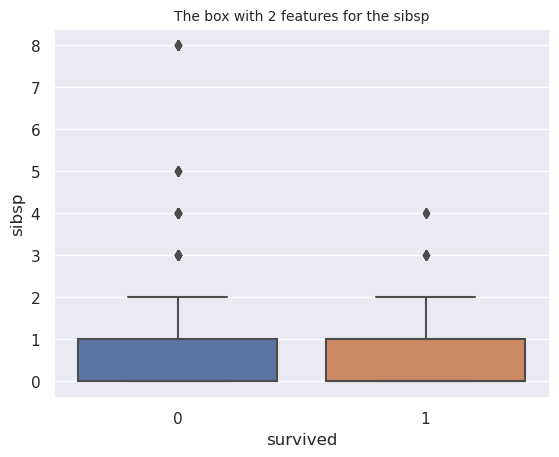

In [26]:
xlabel="survived"
ylabel="sibsp"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)


#### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

Text(0.5, 1.0, 'The box with 2 features for the parch')

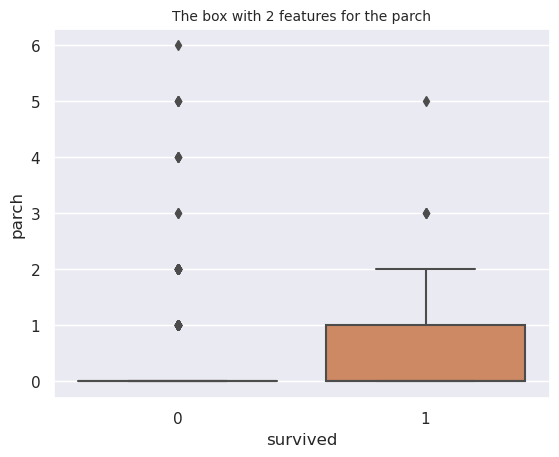

In [27]:
xlabel="survived"
ylabel="parch"
features=data[xlabel].unique().tolist()
sns.boxplot(x=xlabel, y=ylabel, data=data)
plt.title(f"The box with {len(features)} features for the {ylabel}", fontsize=10)


#### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

<Axes: xlabel='alone', ylabel='counts'>

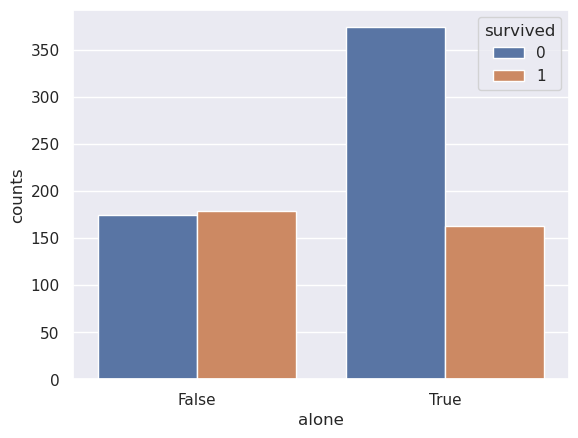

In [28]:
sns.barplot(x="alone", y="counts", hue="survived", estimator="sum", data=data)